In [208]:
import mysql.connector
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
conn=mysql.connector.connect(host='localhost', password='6990Mysql#',user='root',db='sports')
cur=conn.cursor()

In [210]:
cur.execute("SHOW TABLES")
for table in cur:
    print(table)

('avg_discount_on_brand',)
('brand_reviews__in_month',)
('brands',)
('brands_price',)
('complete_table',)
('finance',)
('info',)
('reviews',)
('reviws',)
('traffic',)
('traffics',)


In [211]:
avg_discount_on_brand=pd.read_sql("SELECT * FROM avg_discount_on_brand", conn )
brand_reviews__in_month=pd.read_sql("SELECT * FROM brand_reviews__in_month",conn )
brands=pd.read_sql("SELECT * FROM brands",conn )
brands_price=pd.read_sql("SELECT * FROM brands_price",conn )
finance=pd.read_sql("SELECT * FROM finance",conn )
info=pd.read_sql("SELECT * FROM info",conn )
reviews=pd.read_sql("SELECT * FROM reviews",conn )
traffic=pd.read_sql("SELECT * FROM traffic",conn )

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_7744\4277496451.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_discount_on_brand=pd.read_sql("SELECT * FROM avg_discount_on_brand", conn )
C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_7744\4277496451.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  brand_reviews__in_month=pd.read_sql("SELECT * FROM brand_reviews__in_month",conn )
C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_7744\4277496451.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  brands=pd.re

In [212]:
brand_reviews__in_month.head()

,brand,month,num_reviews
0,Adidas,1,253
1,Adidas,2,272
2,Adidas,3,269
3,Adidas,4,180
4,Adidas,5,172


In [213]:
avg_discount_on_brand



,brand,average_discount
0,Adidas,33.45
1,Nike,0.00


In [214]:
brands_price

,product_id,brand,listing_price,COUNT(*)
0,BD7927,Adidas,299.99,1
1,BD7865,Adidas,299.99,1
2,EF9625,Adidas,279.99,1
3,EF9624,Adidas,279.99,1
4,EF9623,Adidas,279.99,1
...,...,...,...,...
2761,CM0082,Adidas,9.99,1
2762,CM0106,Adidas,9.99,1
2763,CL0252,Adidas,9.99,1
2764,CM0105,Adidas,9.99,1


In [215]:
schema=pd.read_sql("""SELECT TABLE_NAME, GROUP_CONCAT(COLUMN_NAME SEPARATOR ',') AS COLUMNS 
FROM information_schema.COLUMNS 
WHERE TABLE_SCHEMA = 'sports' 
GROUP BY TABLE_NAME""", conn)


C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_7744\1961886027.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schema=pd.read_sql("""SELECT TABLE_NAME, GROUP_CONCAT(COLUMN_NAME SEPARATOR ',') AS COLUMNS


In [216]:
schema

,TABLE_NAME,COLUMNS
0,avg_discount_on_brand,"brand,average_discount"
1,brand_reviews__in_month,"brand,month,num_reviews"
2,brands,"product_id,brand"
3,brands_price,"product_id,brand,listing_price,COUNT(*)"
4,complete_table,"product_id,listing_price,sale_price,discount,r..."
5,finance,"product_id,listing_price,sale_price,discount,r..."
6,info,"product_name,product_id,description"
7,reviews,"product_id,rating,reviews"
8,reviws,"product_id,rating,reviews"
9,traffic,"product_id,last_visited"


In [217]:
reviews

,product_id,rating,reviews
0,G27341,3.3,24.0
1,CM0081,2.6,37.0
2,B44832,4.1,35.0
3,D98205,3.5,72.0
4,B75586,1.0,45.0
...,...,...,...
3115,AT6100-606,0.0,0.0
3116,CT9155-063,3.0,1.0
3117,CI1236-100,5.0,1.0
3118,AH6799-300,4.0,4.0


In [218]:
SPORT_TABLE = pd.read_sql("SELECT * FROM complete_table", conn)

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_7744\2976807128.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  SPORT_TABLE = pd.read_sql("SELECT * FROM complete_table", conn)


In [219]:
SPORT_TABLE.dropna(inplace=True)

In [220]:
# creating gender category
def get_gender(row):
    text = str(row['description']) + ' ' + str(row['product_name'])
    if any(word in text.lower() for word in ['women', 'female', 'girl','woman']):
        return 'female'
    elif any(word in text.lower() for word in ['men', 'male', 'boy','man']):
        return 'male'
    else:
        return 'common'

SPORT_TABLE['gender'] = SPORT_TABLE.apply(lambda row: get_gender(row), axis=1)


In [221]:
# foot wearass and clothing
footwear_keywords = ["trainer", "shoe", "slipper", "foot"]
combine= str(SPORT_TABLE['description']) + ' ' + (SPORT_TABLE['product_name'])
SPORT_TABLE["type"] = SPORT_TABLE["description"].str.contains("|".join(footwear_keywords), case=False) | combine.str.contains("|".join(footwear_keywords), case=False)
SPORT_TABLE["type"] = SPORT_TABLE["type"].map({True: "footwear", False: "clothing"})

In [222]:
SPORT_TABLE['year']=SPORT_TABLE['last_visited'].dt.year.astype("int")

In [223]:
SPORT_TABLE['month']=SPORT_TABLE['last_visited'].dt.month.astype("int")

In [224]:
SPORT_TABLE=SPORT_TABLE[SPORT_TABLE.year<=2023]

In [225]:
SPORT_TABLE.head()

,product_id,listing_price,sale_price,discount,revenue,brand,rating,product_name,description,last_visited,price_category,gender,type,year,month
1,CM0081,9.99,5.99,0.4,398.93,Adidas,2.6,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...,2001-02-18 10:27:00,Budget,female,footwear,2001,2
2,B44832,69.99,34.99,0.5,2204.37,Adidas,4.1,Women's adidas Sport Inspired Questar Ride Shoes,"Inspired by modern tech runners, these women's...",2007-09-18 20:06:00,Budget,female,footwear,2007,9
3,D98205,79.99,39.99,0.5,5182.70,Adidas,3.5,Women's adidas Originals Taekwondo Shoes,This design is inspired by vintage Taekwondo s...,2018-07-19 15:26:00,Budget,female,footwear,2018,7
5,CG4051,47.99,23.99,0.5,86.36,Adidas,4.4,Women's adidas Sport Inspired Duramo Lite 2.0 ...,Refine your interval training in these women's...,2022-03-19 16:36:00,Budget,female,footwear,2022,3
6,CM0080,9.99,5.99,0.4,75.47,Adidas,2.8,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...,2010-03-19 01:46:00,Budget,female,footwear,2010,3


# Visualizations


Text(0, 0.5, 'Total Sales')

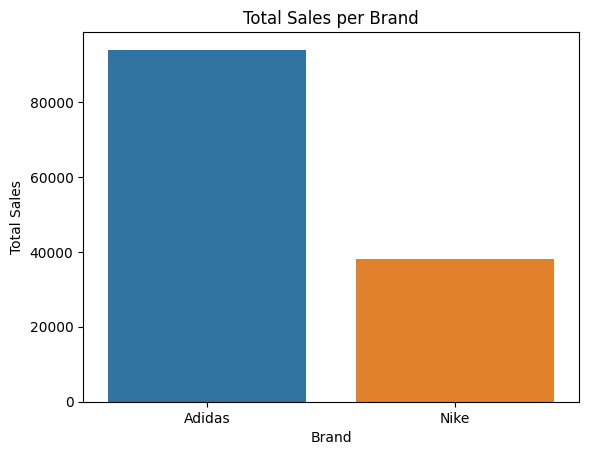

In [226]:
sales_per_brand = SPORT_TABLE.groupby('brand')['sale_price'].sum().reset_index()

# Create the bar plot
sns.barplot(x='brand', y='sale_price', data=sales_per_brand)

# Set the plot title and axis labels
plt.title('Total Sales per Brand')
plt.xlabel('Brand')
plt.ylabel('Total Sales')


In [227]:
nike = SPORT_TABLE.loc[SPORT_TABLE['brand'] == 'Nike']
adidas= SPORT_TABLE.loc[SPORT_TABLE['brand'] == 'Adidas']


# SALES DISTRIBUTION

<AxesSubplot: xlabel='sale_price', ylabel='Count'>

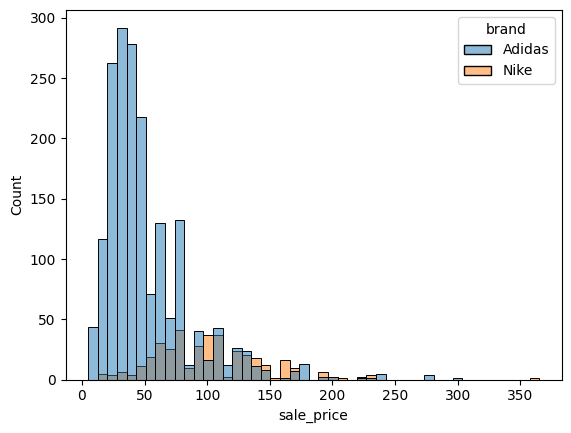

In [228]:
sns.histplot(x='sale_price',data=SPORT_TABLE,hue='brand')

<AxesSubplot: xlabel='brand', ylabel='sale_price'>

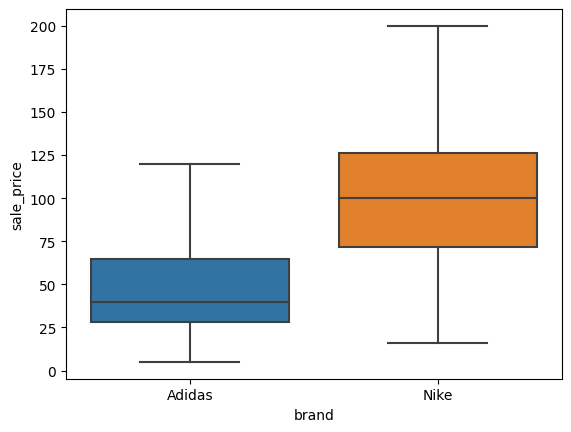

In [229]:
sns.boxplot(x='brand',y='sale_price',data=SPORT_TABLE,sym='')  

### Average sales price by product

<AxesSubplot: xlabel='brand', ylabel='sale_price'>

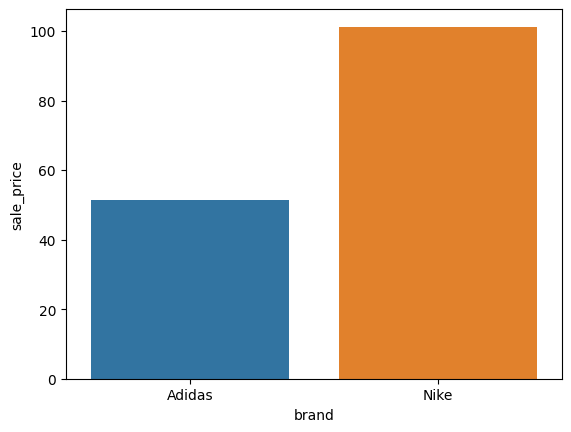

In [230]:
mean_rev= SPORT_TABLE.groupby(['brand','type'])['sale_price'].mean().reset_index()
sns.barplot(x='brand',y='sale_price',data=mean_rev)

<AxesSubplot: xlabel='brand', ylabel='revenue'>

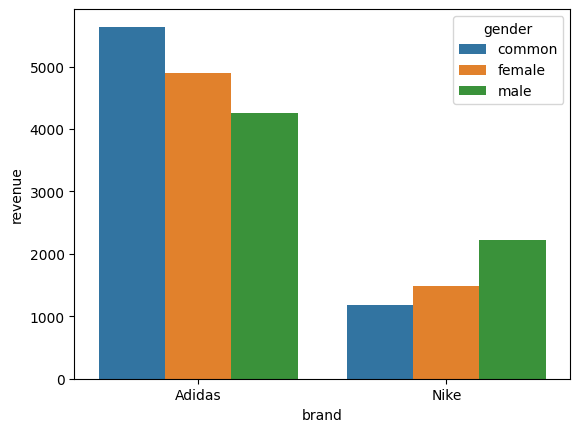

In [231]:
mean_rev_gen= SPORT_TABLE.groupby(['brand','gender'])['revenue'].mean().reset_index()
sns.barplot(x='brand',y='revenue',data=mean_rev_gen,hue='gender')

In [232]:
SPORT_TABLE.columns

Index(['product_id', 'listing_price', 'sale_price', 'discount', 'revenue',
       'brand', 'rating', 'product_name', 'description', 'last_visited',
       'price_category', 'gender', 'type', 'year', 'month'],
      dtype='object')

<AxesSubplot: xlabel='listing_price', ylabel='sale_price'>

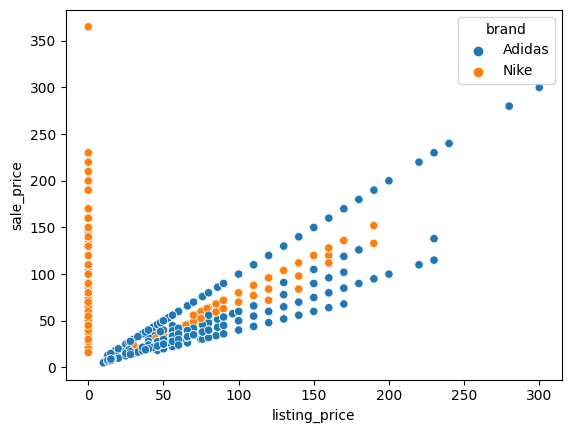

In [233]:
sns.scatterplot(x='listing_price',y='sale_price',data=SPORT_TABLE,hue='brand')

In [234]:
nike.head()

,product_id,listing_price,sale_price,discount,revenue,brand,rating,product_name,description,last_visited,price_category,gender,type,year,month
631,CK2608-100,0.00,149.95,0.0,0.00,Nike,0.0,Nike Air Max 270 React ENG,Refresh your step in the Nike Air Max 270 Reac...,2011-02-18 10:05:00,Elite,common,footwear,2011,2
632,CT5528-001,149.95,89.97,0.0,0.00,Nike,0.0,Nike Air Max 270 React,The Nike Air Max 270 React takes comfort to th...,2011-11-19 04:20:00,Expensive,common,footwear,2011,11
634,AQ2222-200,0.00,89.95,0.0,971.46,Nike,5.0,Nike Air Zoom Wildhorse 5,"Built specifically for trails, the Nike Air Zo...",2019-05-19 01:50:00,Expensive,common,footwear,2019,5
660,CD0113-400,0.00,149.95,0.0,269.91,Nike,5.0,Nike Air Max 270 React ENG,The Nike Air Max 270 React ENG combines a full...,2021-02-20 00:04:00,Elite,common,footwear,2021,2
661,133000-106,0.00,119.95,0.0,0.00,Nike,0.0,Air Jordan OG,"First released in '98, the Air Jordan OG was d...",2021-08-18 01:30:00,Expensive,female,footwear,2021,8


In [235]:
nike_rev=nike.groupby(['gender','month'])['revenue'].sum().reset_index()
adidas_rev=adidas.groupby(['gender','month'])['revenue'].sum().reset_index()


<AxesSubplot: xlabel='month', ylabel='revenue'>

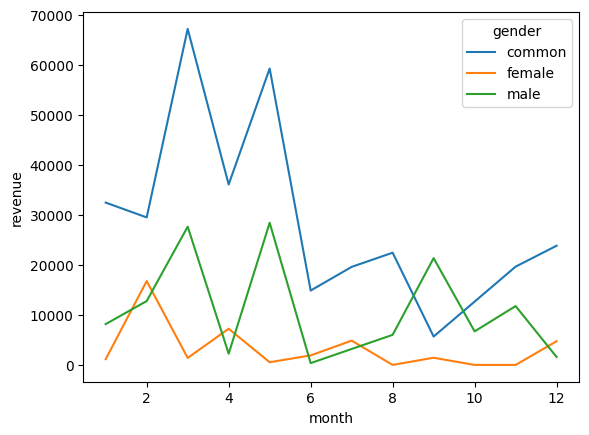

In [236]:
sns.lineplot(x='month',y='revenue',data=nike_rev,hue='gender')

<AxesSubplot: xlabel='month', ylabel='revenue'>

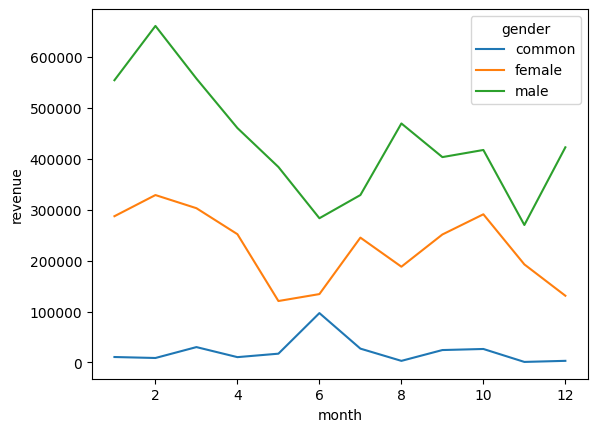

In [237]:
sns.lineplot(x='month',y='revenue',data=adidas_rev,hue='gender')

<AxesSubplot: title={'center': 'adidas'}, xlabel='month'>

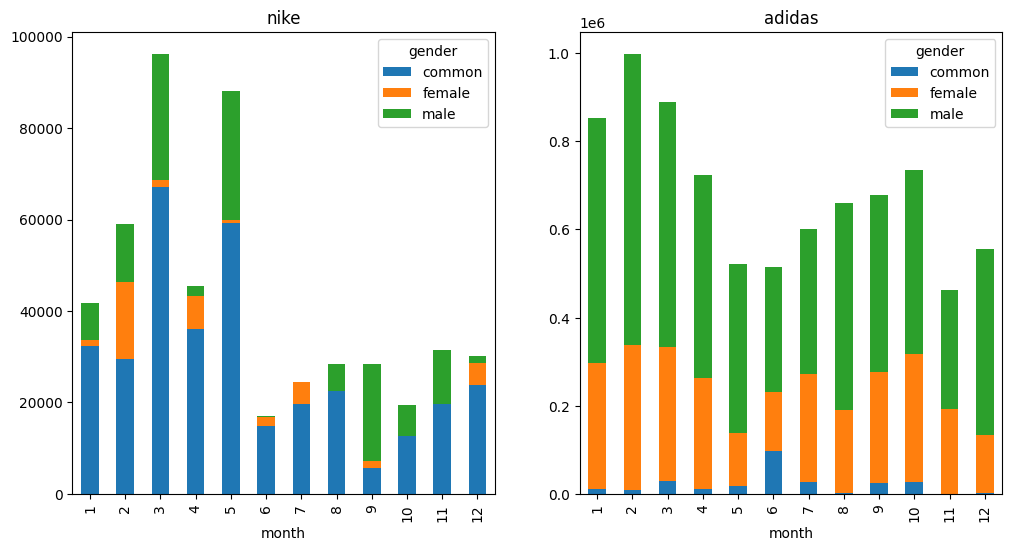

In [238]:
revenue_by_month_NI=nike.groupby(['month','gender'])['revenue'].sum().unstack()
revenue_by_month_AD=adidas.groupby(['month','gender'])['revenue'].sum().unstack()

fig,(ax1,ax2)=plt.subplots(1,2)
revenue_by_month_NI.plot(kind='bar',stacked=True,ax=ax1,figsize=[12,6],title='nike')

revenue_by_month_AD.plot(kind='bar',stacked=True,ax=ax2,title='adidas')

# brands BY PRICE CATEGORY

Text(0, 0.5, 'count')

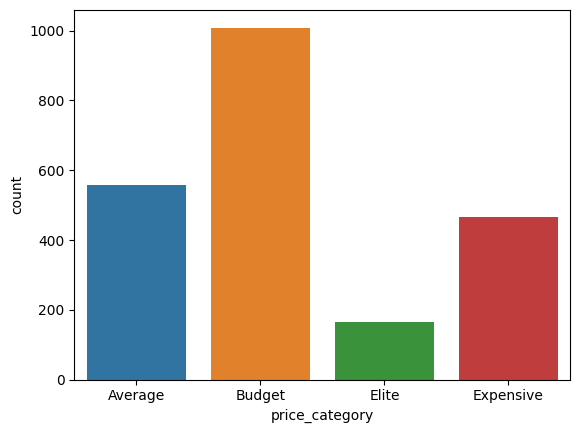

In [239]:
brand_price=SPORT_TABLE.groupby('price_category')['product_id'].count().reset_index()
sns.barplot(y='product_id',data=brand_price,x='price_category')
plt.ylabel('count')

In [240]:
nike_pie=nike.groupby('price_category')['product_id'].count().reset_index()
adidas_pie=adidas.groupby('price_category')['product_id'].count().reset_index()

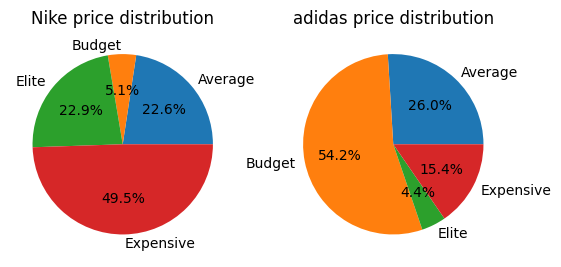

In [241]:
fig, (ax1,ax2)=plt.subplots(1,2)
ax1.pie(nike_pie.product_id, labels=nike_pie.price_category, autopct='%1.1f%%')
ax1.set_title('Nike price distribution')

ax2.pie(adidas_pie.product_id, labels=adidas_pie.price_category, autopct='%1.1f%%')
ax2.set_title('adidas price distribution')
plt.show()

In [242]:
SPORT_TABLE.to_excel("sports_wear.xlsx")

In [243]:
conn.commit()
conn.close()